In [32]:
# Import Tensorflow for keras backend and keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [33]:
x_train = []
y_train = []
x_test = []
y_test = []
for i in range(12):
    for filename in glob.glob('Dataset/Train/'+str(i)+'/*.png'):
        im=cv2.imread(filename)[...,::-1]
        im = cv2.resize(im, (128, 128), interpolation = cv2.INTER_AREA) # resize to 28 * 28 pixel size
        x_train.append(im)
        y_train.append(i)
for filename in glob.glob('Dataset/Test/*.png'):
        im=cv2.imread(filename)[...,::-1]
        im = cv2.resize(im, (128, 128), interpolation = cv2.INTER_AREA) # resize to 28 * 28 pixel size
        x_test.append(im)

In [34]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
y_train = np.array(y_train)

In [40]:
model = keras.Sequential([
    keras.layers.Conv2D(128, 3, activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(12, activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
__________

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train, epochs=50, shuffle=True, validation_split=0.3)

Train on 3325 samples, validate on 1425 samples
Epoch 1/50
3325/3325 [==============================] - 8s 2ms/sample - loss: 1.7353 - acc: 0.3762 - val_loss: 11.5268 - val_acc: 0.0575
Epoch 2/50
3325/3325 [==============================] - 7s 2ms/sample - loss: 1.0443 - acc: 0.6226 - val_loss: 11.8285 - val_acc: 0.1095
Epoch 3/50
3325/3325 [==============================] - 7s 2ms/sample - loss: 0.7704 - acc: 0.7218 - val_loss: 12.4235 - val_acc: 0.1200
Epoch 4/50
3325/3325 [==============================] - 8s 2ms/sample - loss: 0.6627 - acc: 0.7621 - val_loss: 11.8253 - val_acc: 0.1481
Epoch 5/50
3325/3325 [==============================] - 7s 2ms/sample - loss: 0.5122 - acc: 0.8174 - val_loss: 11.8851 - val_acc: 0.1818
Epoch 6/50
3325/3325 [==============================] - 7s 2ms/sample - loss: 0.3654 - acc: 0.8737 - val_loss: 12.6559 - val_acc: 0.1347
Epoch 7/50
3325/3325 [==============================] - 7s 2ms/sample - loss: 0.3064 - acc: 0.8815 - val_loss: 12.5569 - val_acc: 

In [39]:
model.evaluate(x_train,y_train)

4750/4750 [==============================] - 4s 880us/sample - loss: 3.9182 - acc: 0.7463


[3.918196274062671, 0.7463158]

In [30]:
predictions = model.predict(x_train)

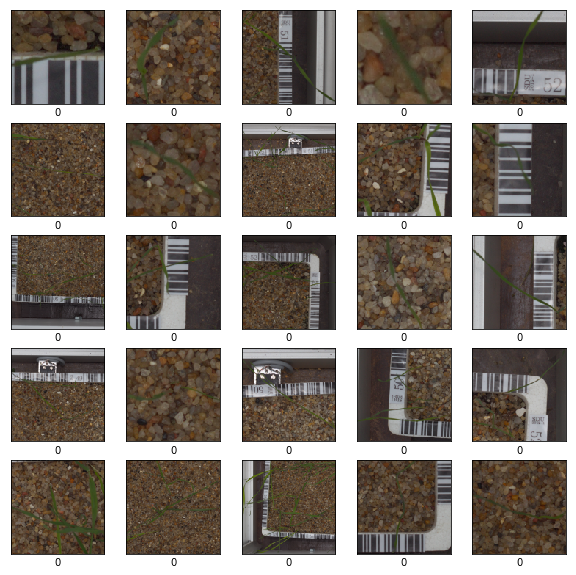

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()